<a href="https://colab.research.google.com/github/riskakurniaa/PCVK_Ganjil_2024/blob/main/Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.


Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.


In [2]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

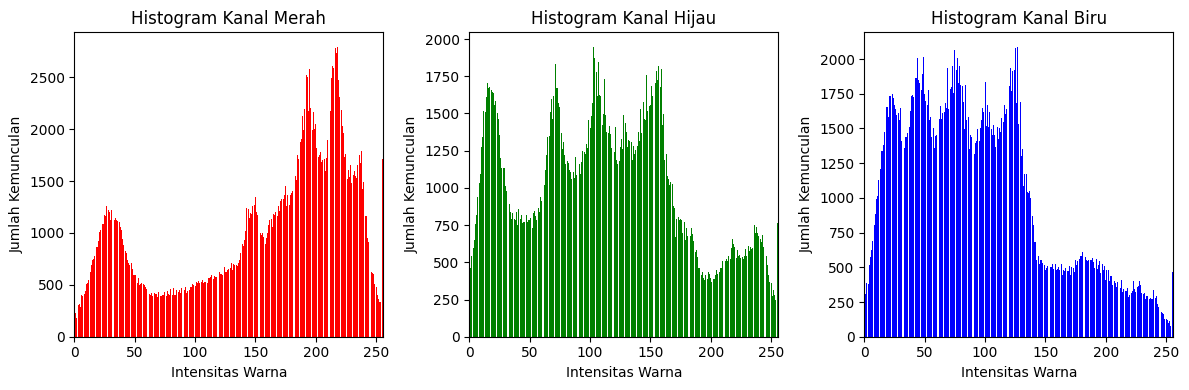

In [16]:
# Baca gambar "lena.jpg"
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Pisahkan kanal warna
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Menghitung histogram untuk masing-masing kanal warna secara manual
histogram_red = np.zeros(256, dtype=int)
histogram_green = np.zeros(256, dtype=int)
histogram_blue = np.zeros(256, dtype=int)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel_value_red = red_channel[i, j]
        pixel_value_green = green_channel[i, j]
        pixel_value_blue = blue_channel[i, j]

        histogram_red[pixel_value_red] += 1
        histogram_green[pixel_value_green] += 1
        histogram_blue[pixel_value_blue] += 1

# Menampilkan histogram masing-masing kanal warna dalam bentuk bar
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(range(256), histogram_red, color='red')
plt.title('Histogram Kanal Merah')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(132)
plt.bar(range(256), histogram_green, color='green')
plt.title('Histogram Kanal Hijau')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(133)
plt.bar(range(256), histogram_blue, color='blue')
plt.title('Histogram Kanal Biru')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

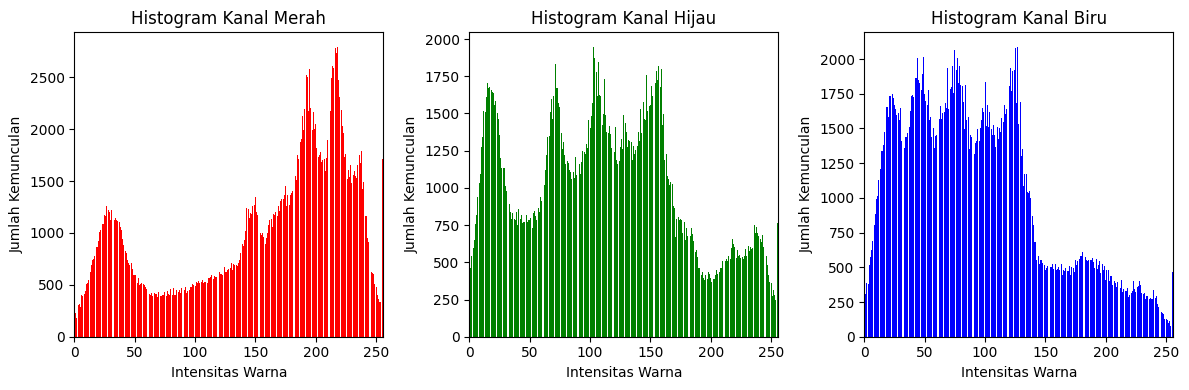

In [17]:
# Baca gambar "lena.jpg"
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Pisahkan kanal warna
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Menghitung histogram untuk masing-masing kanal warna menggunakan numpy.histogram
histogram_red, _ = np.histogram(red_channel, bins=256, range=(0, 256))
histogram_green, _ = np.histogram(green_channel, bins=256, range=(0, 256))
histogram_blue, _ = np.histogram(blue_channel, bins=256, range=(0, 256))

# Menampilkan histogram masing-masing kanal warna dalam bentuk bar
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(range(256), histogram_red, color='red')
plt.title('Histogram Kanal Merah')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(132)
plt.bar(range(256), histogram_green, color='green')
plt.title('Histogram Kanal Hijau')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(133)
plt.bar(range(256), histogram_blue, color='blue')
plt.title('Histogram Kanal Biru')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

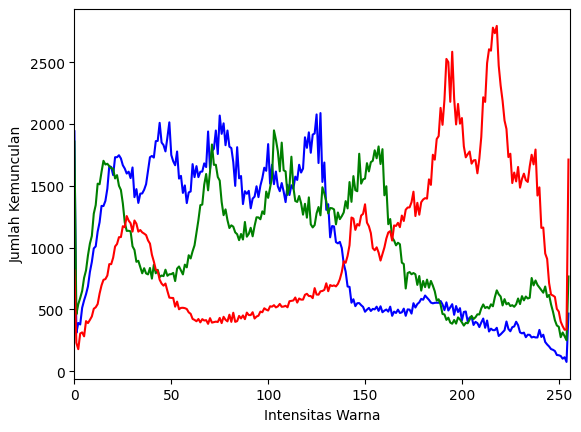

In [18]:
colors = ("b", "g", "r")
channel_ids = (0,1,2)

# membuat histogram plot

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


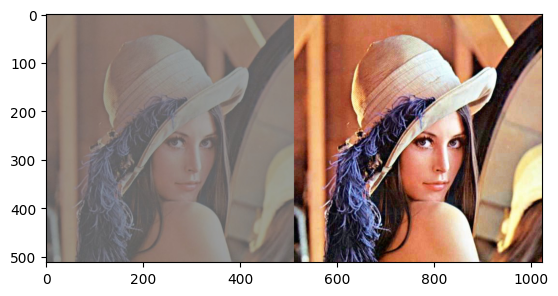

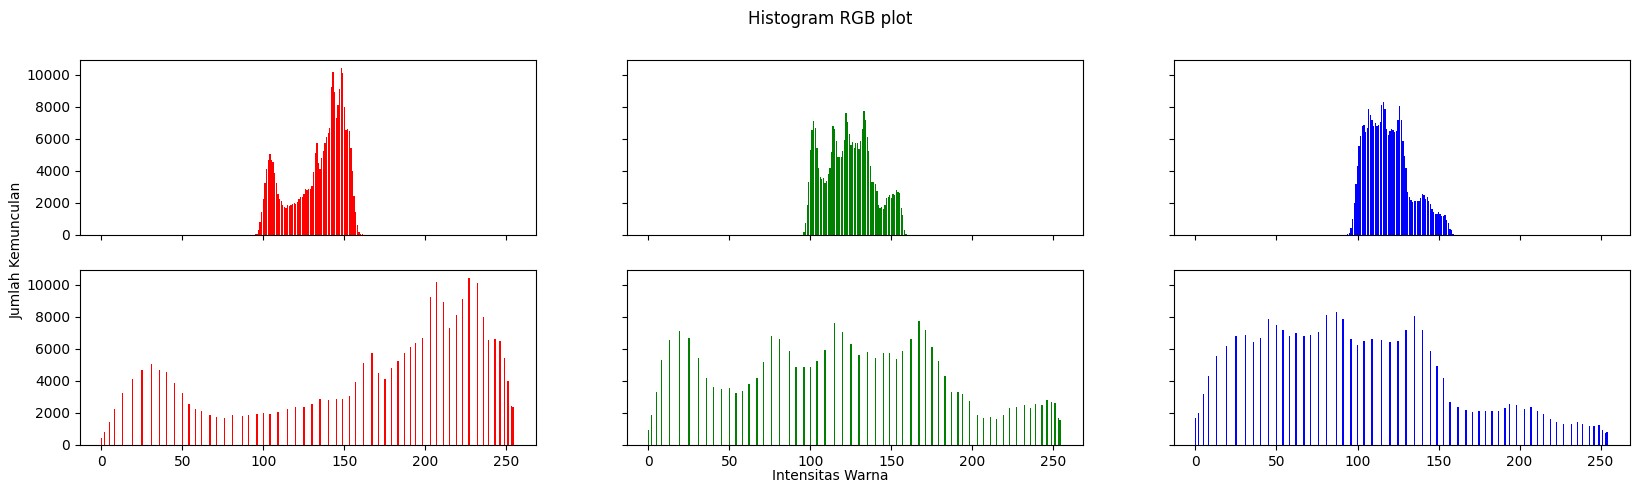

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar "lena_lc.jpg"
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3,256))
    for y in range(0,height) :
        for x in range(0,width) :
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

height, width, depth = np.shape(img1)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
    for x in range(0,width):
        blue[img1[y][x][0]] += 1
        green[img1[y][x][1]] += 1
        red[img1[y][x][2]] += 1


histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((cv.cvtColor(img1,cv.COLOR_BGR2RGB), cv.cvtColor(img2,cv.COLOR_BGR2RGB))) #concatenate image
plt.imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
    fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='red')
    axs[0,1].bar(names, histo_asli[1], color='green')
    axs[0,2].bar(names, histo_asli[0], color='blue')
    axs[1,0].bar(names, equal_histo[2], color='red')
    axs[1,1].bar(names, equal_histo[1], color='green')
    axs[1,2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
    fig. suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

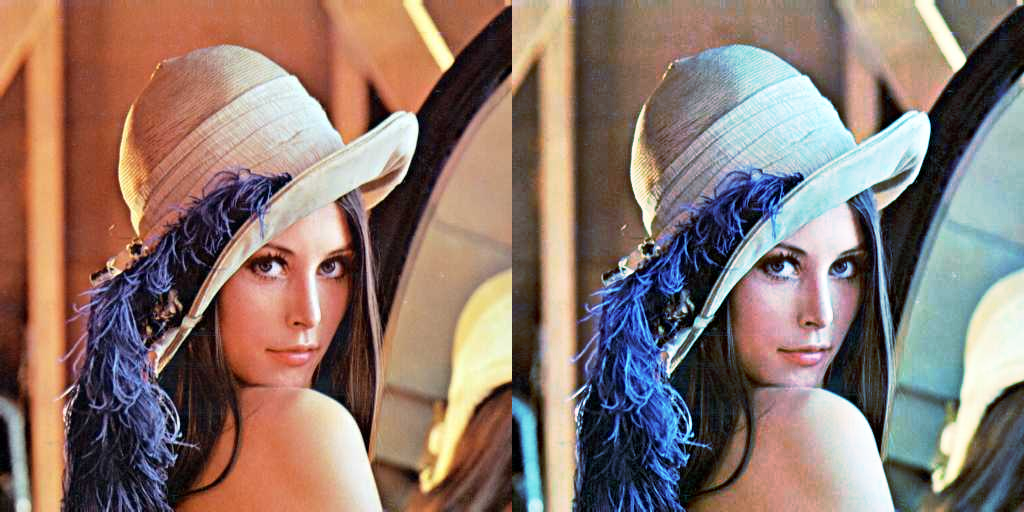

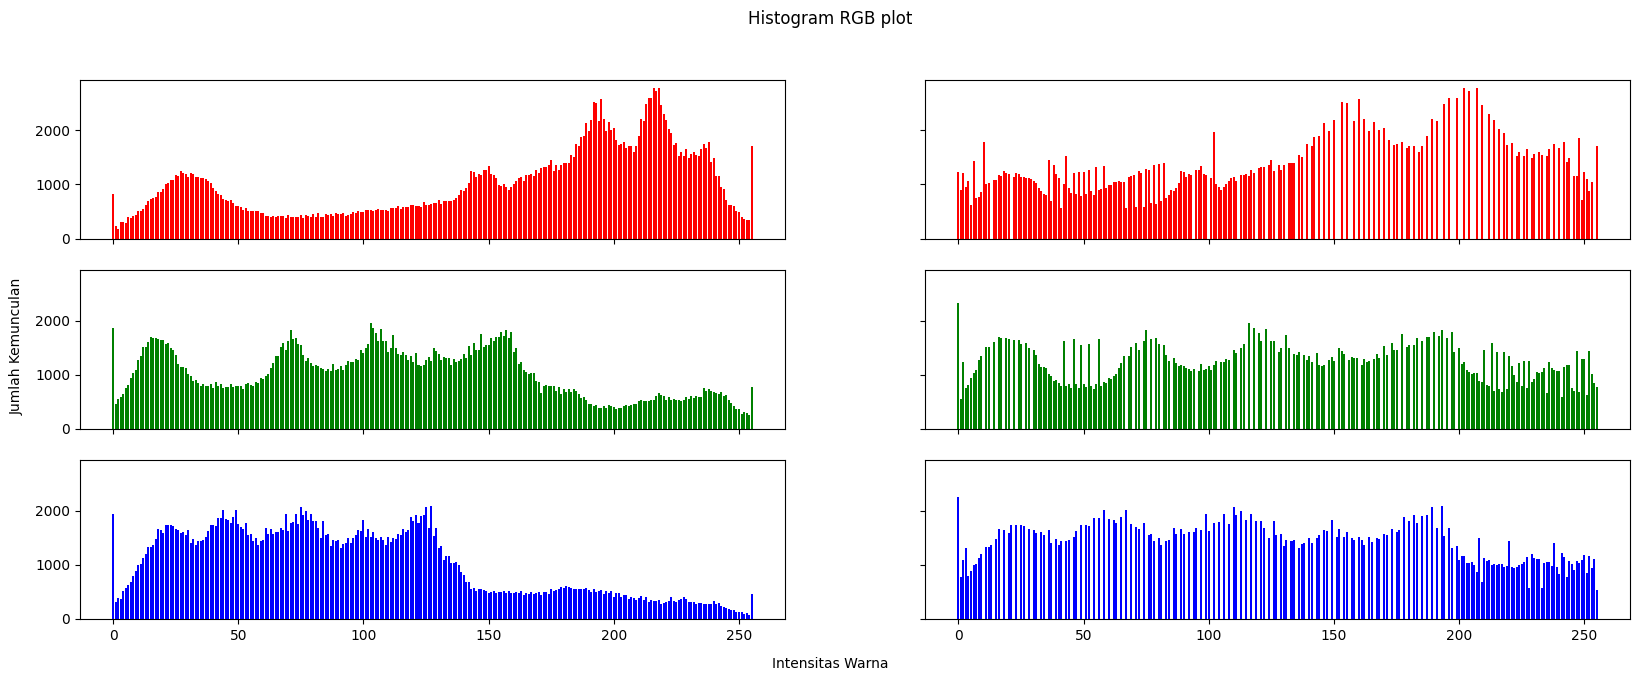

In [20]:
# Baca gambar "lena_lc.jpg"
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

histo_asli = histog(img1)

# Split the image into individual color channels
blue_channel = img1[:, :, 0]
green_channel = img1[:, :, 1]
red_channel = img1[:, :, 2]

# Perform histogram equalization on each color channel
equalized_blue = cv2.equalizeHist(blue_channel)
equalized_green = cv2.equalizeHist(green_channel)
equalized_red = cv2.equalizeHist(red_channel)

# Merge the equalized color channels back into an RGB image
equalized_img = cv2.merge([equalized_blue, equalized_green, equalized_red])

# Calculate histograms for original and equalized images
histo_equalized = histog(equalized_img)

final_frame = cv2.hconcat((img1, equalized_img))  # Concatenate images
cv2_imshow(final_frame)  # Display the final image using cv2_imshow

names = np.arange(256)
isgrayimg = np.array_equal(blue_channel, green_channel) and np.array_equal(blue_channel, red_channel)
if not isgrayimg:
    fig, axs = plt.subplots(3, 2, figsize=[20, 7], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_equalized[2], color='red')
    axs[1, 0].bar(names, histo_asli[1], color='green')
    axs[1, 1].bar(names, histo_equalized[1], color='green')
    axs[2, 0].bar(names, histo_asli[0], color='blue')
    axs[2, 1].bar(names, histo_equalized[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, histo_equalized[0], color='gray')

plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

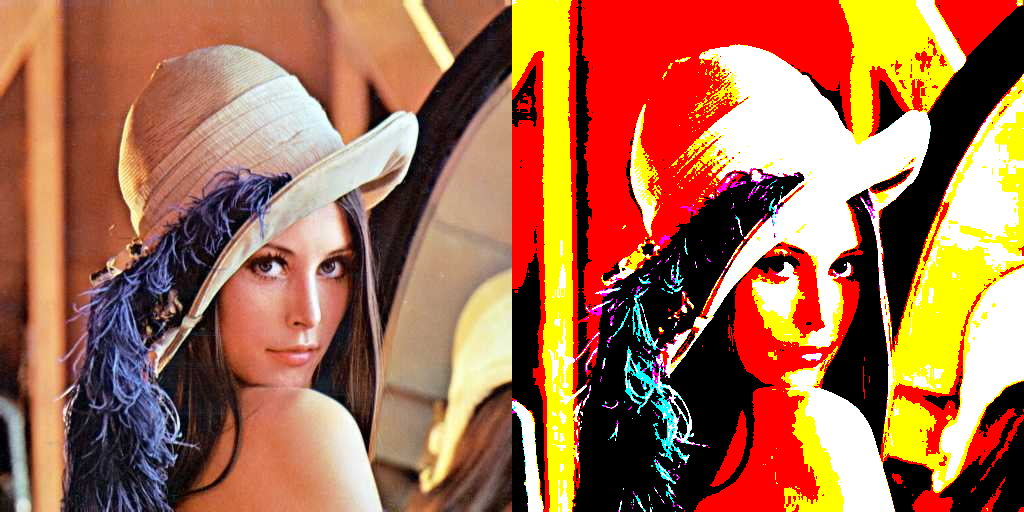

In [21]:
# Buat palet warna dengan 8 warna yang ditentukan
colors = {
    "black": (0, 0, 0),
    "green": (0, 255, 0),
    "yellow": (255, 255, 0),
    "blue": (0, 0, 255),
    "cyan": (0, 255, 255),
    "magenta": (255, 0, 255),
    "white": (255, 255, 255),
}

# Baca gambar "lena.jpg"
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Salin gambar asli untuk ditampilkan di sebelah kiri
original_img = img.copy()

# Loop melalui setiap piksel gambar dan ganti warnanya sesuai dengan palet warna
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        pixel_color = tuple(img[x, y])
        min_dist = float('inf')
        nearest_color = None
        for name, color in colors.items():
            dist = np.linalg.norm(np.array(pixel_color) - np.array(color))
            if dist < min_dist:
                min_dist = dist
                nearest_color = color
        img[x, y] = nearest_color

# Tampilkan gambar asli di sebelah kiri dan gambar yang telah diubah di sebelah kanan
combined_img = np.hstack((original_img, img))
cv2_imshow(combined_img)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

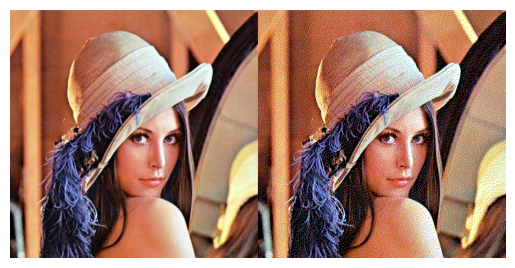

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def apply_floyd_steinberg_dithering(image):
    # Loop through each pixel in the image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            old_pixel_blue = image[y, x, 0]
            old_pixel_green = image[y, x, 1]
            old_pixel_red = image[y, x, 2]

            # Quantize to binary (0 or 255)
            new_pixel_blue = 0 if old_pixel_blue < 128 else 255
            new_pixel_green = 0 if old_pixel_green < 128 else 255
            new_pixel_red = 0 if old_pixel_red < 128 else 255

            # Update the pixel with the new quantized value
            image[y, x, 0] = new_pixel_blue
            image[y, x, 1] = new_pixel_green
            image[y, x, 2] = new_pixel_red

            # Calculate the quantization error
            error_blue = old_pixel_blue - new_pixel_blue
            error_green = old_pixel_green - new_pixel_green
            error_red = old_pixel_red - new_pixel_red

            # Apply Floyd-Steinberg dithering
            if x < image.shape[1] - 1:
                image[y, x + 1, 0] = np.clip(image[y, x + 1, 0] + error_blue * 7 / 16, 0, 255)
                image[y, x + 1, 1] = np.clip(image[y, x + 1, 1] + error_green * 7 / 16, 0, 255)
                image[y, x + 1, 2] = np.clip(image[y, x + 1, 2] + error_red * 7 / 16, 0, 255)
            if x > 0 and y < image.shape[0] - 1:
                image[y + 1, x - 1, 0] = np.clip(image[y + 1, x - 1, 0] + error_blue * 3 / 16, 0, 255)
                image[y + 1, x - 1, 1] = np.clip(image[y + 1, x - 1, 1] + error_green * 3 / 16, 0, 255)
                image[y + 1, x - 1, 2] = np.clip(image[y + 1, x - 1, 2] + error_red * 3 / 16, 0, 255)
            if y < image.shape[0] - 1:
                image[y + 1, x, 0] = np.clip(image[y + 1, x, 0] + error_blue * 5 / 16, 0, 255)
                image[y + 1, x, 1] = np.clip(image[y + 1, x, 1] + error_green * 5 / 16, 0, 255)
                image[y + 1, x, 2] = np.clip(image[y + 1, x, 2] + error_red * 5 / 16, 0, 255)
            if x < image.shape[1] - 1 and y < image.shape[0] - 1:
                image[y + 1, x + 1, 0] = np.clip(image[y + 1, x + 1, 0] + error_blue * 1 / 16, 0, 255)
                image[y + 1, x + 1, 1] = np.clip(image[y + 1, x + 1, 1] + error_green * 1 / 16, 0, 255)
                image[y + 1, x + 1, 2] = np.clip(image[y + 1, x + 1, 2] + error_red * 1 / 16, 0, 255)

    return image

# Load the original input image
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Convert the image from BGR to RGB (for proper display with Matplotlib)
original_image_rgb = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

# Apply dithering to the image (on RGB)
dithered_image = original_image_rgb.copy()  # Make a copy of the original image
dithered_image = apply_floyd_steinberg_dithering(dithered_image)

# Concatenate original and dithered images side by side for comparison
final_frame = np.hstack((original_image_rgb, dithered_image))

# Display the images
plt.imshow(final_frame)
plt.axis('off')
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

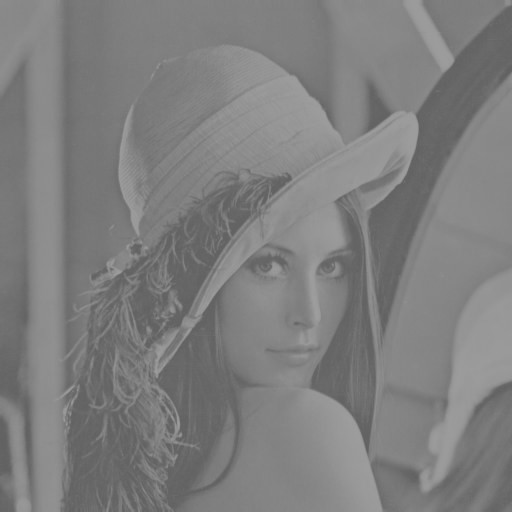

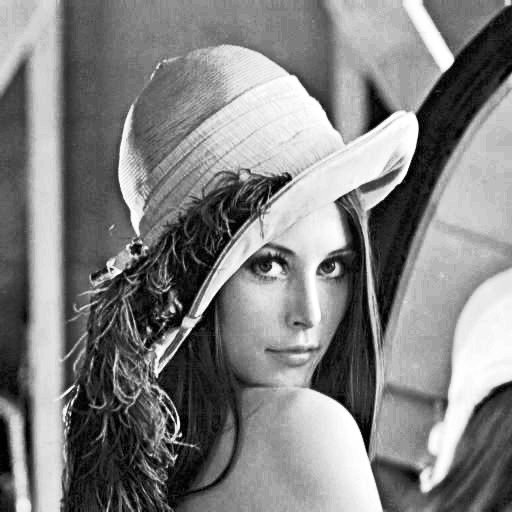

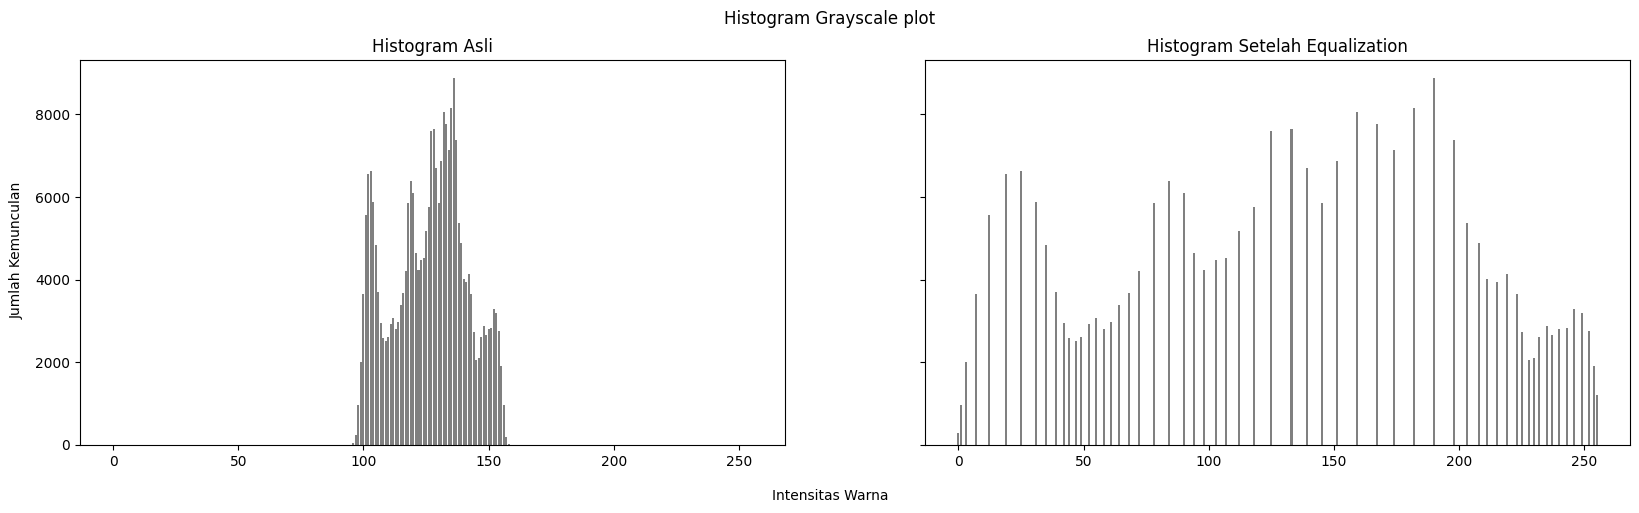

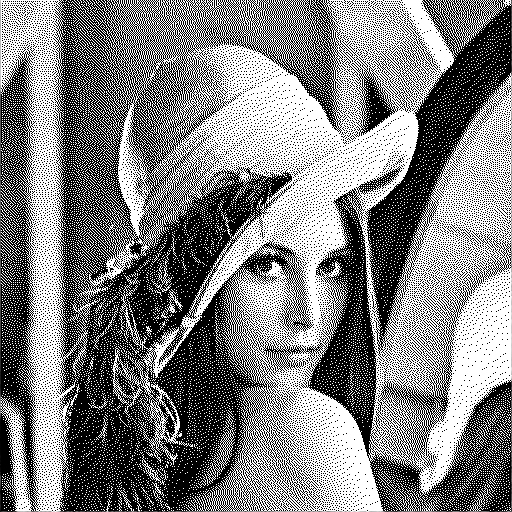

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Gunakan ini jika di Google Colab

# Baca citra asli (lena_lc.jpg) sebagai grayscale
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/lena_lc.jpg", cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasi dithering Floyd-Steinberg
height, width = equalized_image.shape
dithered_image = np.copy(equalized_image)

# Threshold untuk dithering
threshold = 128  # Gunakan threshold umum antara 0-255

for y in range(height - 1):  # Iterasi sampai baris kedua terakhir
    for x in range(1, width - 1):  # Iterasi dari kolom kedua
        old_pixel = dithered_image[y, x]
        # Ubah pixel ke 0 atau 255 berdasarkan threshold
        new_pixel = 255 if old_pixel >= threshold else 0
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel

        # Sebarkan error ke piksel tetangga
        dithered_image[y, x + 1] = np.clip(dithered_image[y, x + 1] + quantization_error * 7 / 16, 0, 255)
        dithered_image[y + 1, x - 1] = np.clip(dithered_image[y + 1, x - 1] + quantization_error * 3 / 16, 0, 255)
        dithered_image[y + 1, x] = np.clip(dithered_image[y + 1, x] + quantization_error * 5 / 16, 0, 255)
        dithered_image[y + 1, x + 1] = np.clip(dithered_image[y + 1, x + 1] + quantization_error * 1 / 16, 0, 255)

# Tampilkan citra asli
cv2_imshow(image)

# Tampilkan citra hasil equalization
cv2_imshow(equalized_image)

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:, 0], color='gray')
axs[1].bar(range(256), histo_equalized[:, 0], color='gray')
axs[0].set_title("Histogram Asli")
axs[1].set_title("Histogram Setelah Equalization")

# Menampilkan histogram dan gambar secara bersamaan
plt.show()

# Tampilkan citra hasil dithering
cv2_imshow(dithered_image)